# Goal


### To train three classifiers to predict a car's make, model and year using Inception_v3 model using [Monk](https://github.com/Tessellate-Imaging/monk_v1)


In [ ]:
# Mount google drive, if using drive to store the data
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.chdir("")  # Change directory to Project_directory

# Table of Contents

1.   Install Monk
4.   Using Trained Model for demo
2.   Dataset
3.   Directory Structure
5.   Imports
6.   Make Classifier
7.   Model Classifier
8.   Year Classifier



<a id='0'></a>
# Install Monk

## Using pip (Recommended)

  - colab (gpu) 
      - All bakcends: `pip install -U monk-colab`
      

  - kaggle (gpu) 
      - All backends: `pip install -U monk-kaggle`
      

  - cuda 10.2	
      - All backends: `pip install -U monk-cuda102`
      - Gluon bakcned: `pip install -U monk-gluon-cuda102`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda102`
      - Keras backend: `pip install -U monk-keras-cuda102`
      

  - cuda 10.1	
      - All backend: `pip install -U monk-cuda101`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda101`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda101`
	  - Keras backend: `pip install -U monk-keras-cuda101`
      

  - cuda 10.0	
      - All backend: `pip install -U monk-cuda100`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda100`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda100`
	  - Keras backend: `pip install -U monk-keras-cuda100`
      

  - cuda 9.2	
      - All backend: `pip install -U monk-cuda92`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda92`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda92`
	  - Keras backend: `pip install -U monk-keras-cuda92`
      

  - cuda 9.0	
      - All backend: `pip install -U monk-cuda90`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda90`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda90`
	  - Keras backend: `pip install -U monk-keras-cuda90`
      

  - cpu 		
      - All backend: `pip install -U monk-cpu`
	  - Gluon backend: `pip install -U monk-gluon-cpu`
	  - Pytorch backend: `pip install -U monk-pytorch-cpu`
	  - Keras backend: `pip install -U monk-keras-cpu`

## Install Monk Manually (Not recommended)
 
### Step 1: Clone the library
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 
 
 
### Step 2: Install requirements 
 - Linux
     - Cuda 9.0
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu90.txt`
     - Cuda 9.2
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu92.txt`
     - Cuda 10.0
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu100.txt`
     - Cuda 10.1
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu101.txt`
     - Cuda 10.2
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu102.txt`
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Linux && pip install -r requirements_cpu.txt`
 
 
  - Windows
     - Cuda 9.0 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu90.txt`
     - Cuda 9.2 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu92.txt`
     - Cuda 10.0 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu100.txt`
     - Cuda 10.1 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu101.txt`
     - Cuda 10.2 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu102.txt`
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cpu.txt`
         
         
  - Mac
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Mac && pip install -r requirements_cpu.txt`
         
         
  - Misc
      - Colab (GPU)
          - `cd monk_v1/installation/Misc && pip install -r requirements_colab.txt`
      - Kaggle (GPU)
          - `cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt`
 
 
 
### Step 3: Add to system path (Required for every terminal or kernel run)
 - `import sys`
 - `sys.path.append("monk_v1/");`

In [ ]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

In [ ]:
# If using Colab install using the commands below
# !cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

# If using Kaggle uncomment the following command
#!cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt

# Or else, select the requirements file as per OS and CUDA version when using a local system or cloud


# Using Trained Classifier for demo

In [ ]:
# Download trained models
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1YO8MI4oZmC1LdHGGbPKTsOz2Xi7Qw-O-' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1YO8MI4oZmC1LdHGGbPKTsOz2Xi7Qw-O-" -O cls_vehicle_make_model_trained.tar.gz && rm -rf /tmp/cookies.txt

In [3]:
! tar -xzf cls_vehicle_make_model_trained.tar.gz

In [4]:
! ls workspace

 comparison	   Model_classifier   Year_classifier
 Make_classifier  'Sample Images'


In [5]:
# Imports
import os
import sys

# Using PyTorch backend 
# When installed using pip
from monk.pytorch_prototype import prototype

# When installed manually (Uncomment the following)
# sys.path.append("monk_v1/");
# sys.path.append("monk_v1/monk/");
# from monk.pytorch_prototype import prototype

In [ ]:
# Load the trained model

# Loads Make Classifier
ptf = prototype(verbose=1);
ptf.Prototype("Make_classifier", "inception-v3-pytorch", eval_infer=True);

# Uncomment for Model Classifier
# ptf = prototype(verbose=1);
# ptf.Prototype("Model_classifier", "inception-v3-pytorch", eval_infer=True);

Prediction
    Image name:         workspace/Sample Images/Ferrari_458_Italia_2012_00096.jpg
    Predicted class:      Ferrari
    Predicted score:      0.9999351501464844



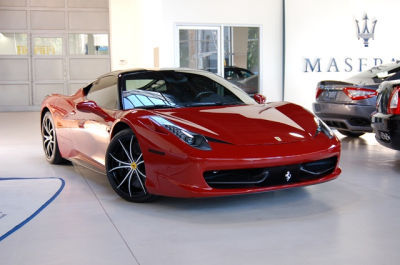

In [7]:
# Infer
from IPython.display import Image
img_name = "workspace/Sample Images/Ferrari_458_Italia_2012_00096.jpg"
predictions = ptf.Infer(img_name=img_name);
Image(filename=img_name, width = 450)

Prediction
    Image name:         workspace/Sample Images/Mercedes-Benz_S-Class_2012_00008.jpg
    Predicted class:      Mercedes-Benz
    Predicted score:      0.9979146122932434



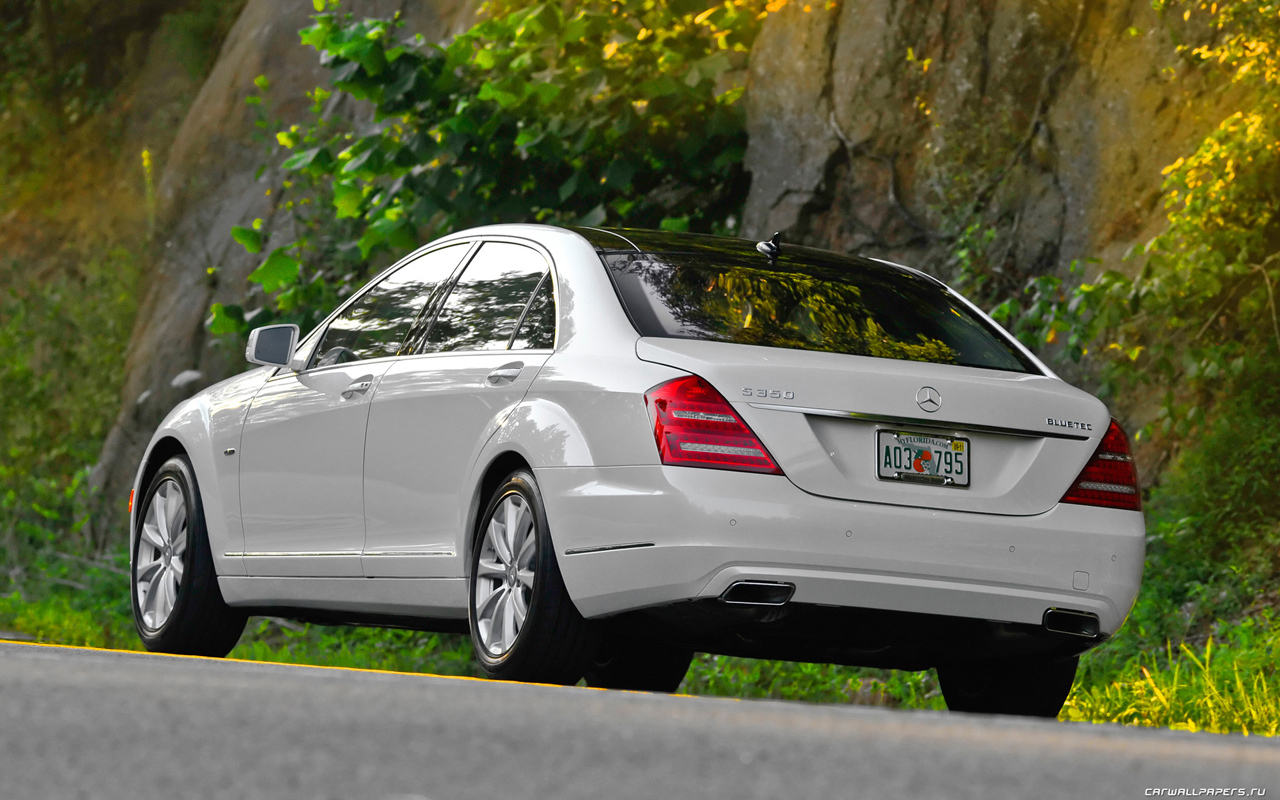

In [ ]:
img_name = "workspace/Sample Images/Mercedes-Benz_S-Class_2012_00008.jpg"
predictions = ptf.Infer(img_name=img_name);
Image(filename=img_name, width = 450)

Prediction
    Image name:         workspace/Sample Images/BMW_3_Series_2012_00070.jpg
    Predicted class:      BMW
    Predicted score:      0.9997444748878479



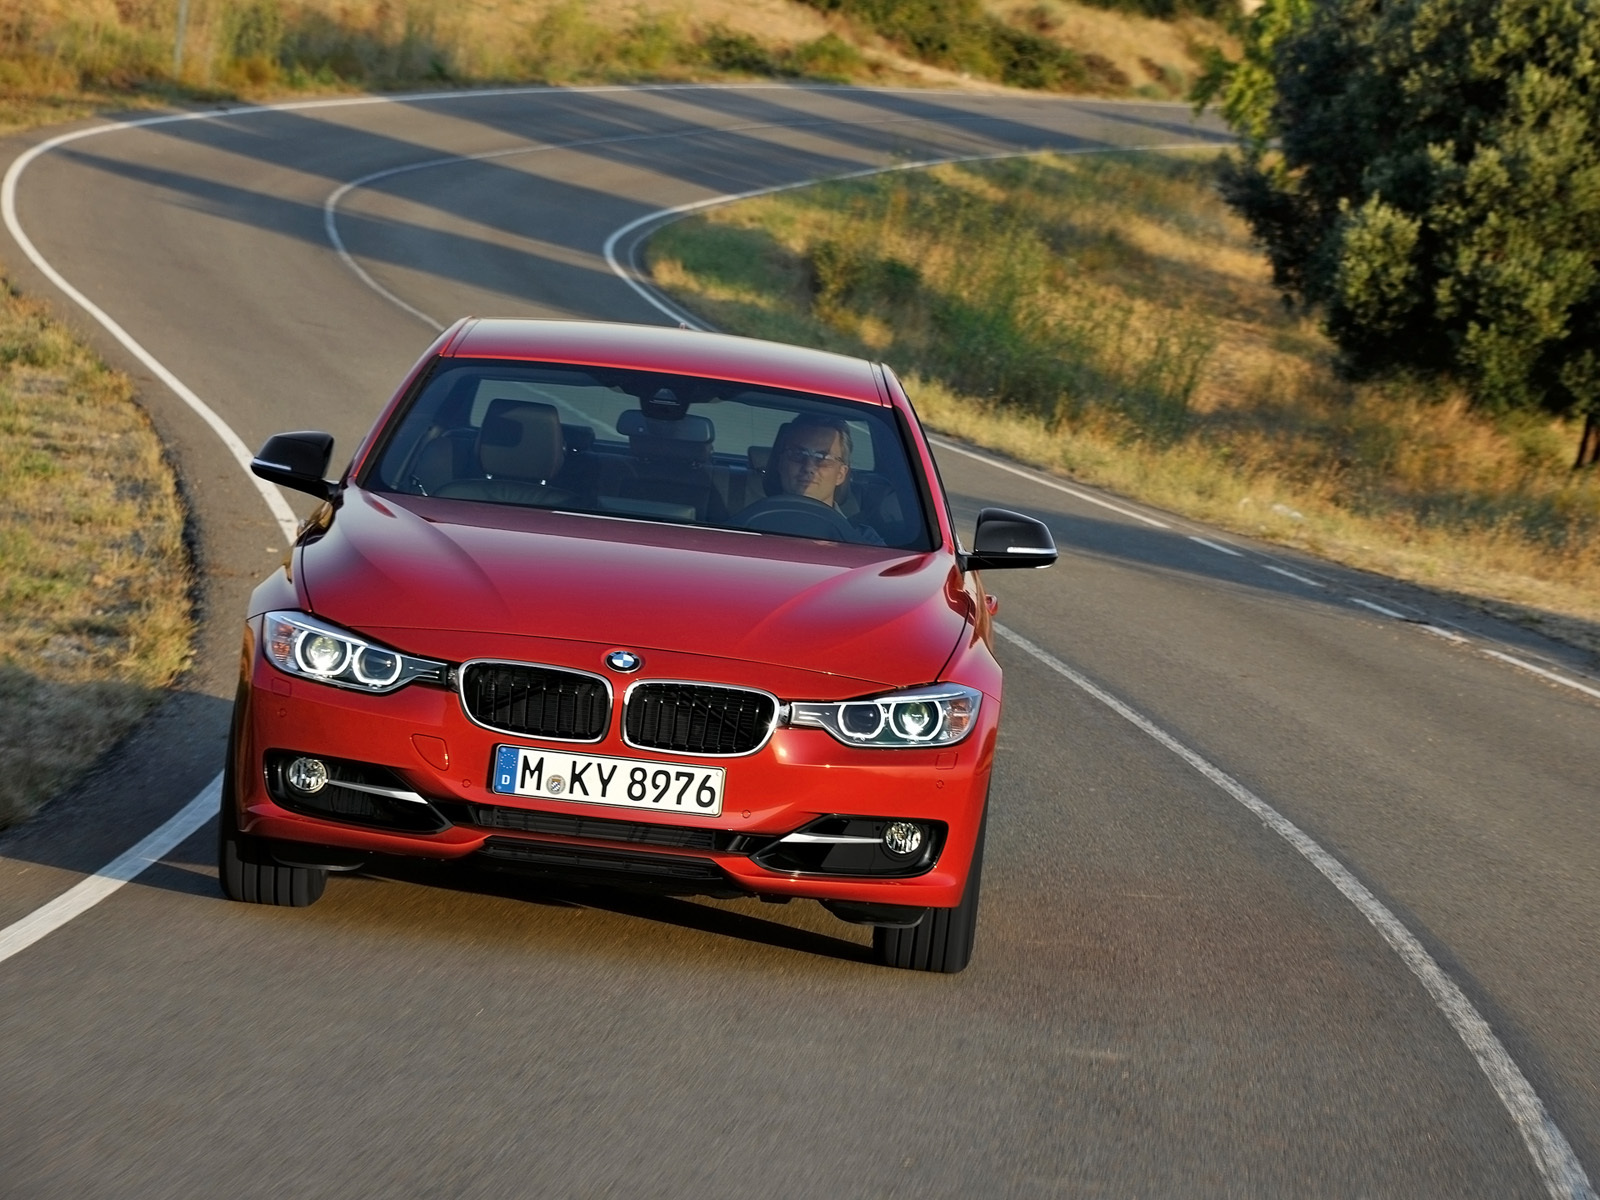

In [ ]:
img_name = "workspace/Sample Images/BMW_3_Series_2012_00070.jpg"
predictions = ptf.Infer(img_name=img_name);
Image(filename=img_name, width = 450)

# Dataset

Description: The dataset is divided into two parts, train and test dataset, each containing around 8000 images. The labels corresponding to each image are stored in the devkit.

Link to the dataset: https://ai.stanford.edu/~jkrause/cars/car_dataset.html



In [ ]:
! mkdir data  # Create a directory for the dataset

Train Data

In [ ]:
! wget "http://imagenet.stanford.edu/internal/car196/cars_train.tgz" # Train dataset

In [ ]:
! tar -xvf 'cars_train.tgz' -C 'data' #Extracting

Devkit

In [ ]:
! wget "https://ai.stanford.edu/~jkrause/cars/car_devkit.tgz" # Devkit for the dataset

In [ ]:
! tar -xvf 'car_devkit.tgz' -C 'data' #Extracting

Test Data

In [ ]:
! wget "http://imagenet.stanford.edu/internal/car196/cars_test.tgz" # Test dataset

In [ ]:
! tar -xvf 'cars_test.tgz' -C 'data' #Extracting

In [ ]:
# Download test annotations with labels
! wget "http://imagenet.stanford.edu/internal/car196/cars_test_annos_withlabels.mat" -P './data/devkit'

## Loading files containing labels
Descriptions of the files are as follows:

- cars_meta.mat:
  Contains a cell array of class names, one for each class.

- cars_train_annos.mat:
  Contains the variable 'annotations', which is a struct array of length
  num_images and where each element has the fields:

>  1.   bbox_x1: Min x-value of the bounding box, in pixels
>  2.  bbox_x2: Max x-value of the bounding box, in pixels
>  3.  bbox_y1: Min y-value of the bounding box, in pixels
>  4.  bbox_y2: Max y-value of the bounding box, in pixels
>  5.  class: Integral id of the class the image belongs to.
>  6.  fname: Filename of the image within the folder of images.

- cars_test_annos.mat:
  Same format as 'cars_train_annos.mat', except the class is not provided.

- cars_test_annos_withlabels.mat:
  Same format as 'cars_train_annos.mat', including the class

### Converting the ID to its corresponding label


In [ ]:
from scipy import io  # Required to load .mat file
import pandas as pd

In [ ]:
class_name = io.loadmat('./data/devkit/cars_meta.mat')

In [ ]:
combined = []
for name in class_name['class_names'][0]:
  name=name.flat[0]
  splits = name.split(" ")
  make = splits[0]
  year = splits[len(splits)-1]
  model = ""
  for tmp in splits[1:len(splits)-2]:
    model = model + tmp + "_"
  combined.append([make,model,year])  

###Examples for IDs and class names:

In [ ]:
print("ID\t "+"{:<20}".format("Make")+ "{:<20}".format("Model")+ "{:<20}".format("Year"))
for i in [140,60,18,50,161]:
  print(str(i)+"\t "+"{:<20}".format(combined[i][0])+"{:<20}".format(combined[i][1])+"{:<20}".format(combined[i][2]))

ID	 Make                Model               Year                
140	 Infiniti            G_Coupe_            2012                
60	 Chevrolet           Impala_             2007                
18	 Audi                TT_                 2011                
50	 Cadillac            CTS-V_              2012                
161	 Mercedes-Benz       C-Class_            2012                


### Assigning a label to each image in the train dataset

In [ ]:
train_labels = io.loadmat('./data/devkit/cars_train_annos.mat')

In [ ]:
data=[[row.flat[0] for row in line][4:] for line in train_labels['annotations'][0]]

In [ ]:
# Separating make, model and year for each image and saving them in different csv files
make = [[row[1],combined[row[0]-1][0]] for row in data]
model= [[row[1],combined[row[0]-1][1]] for row in data]
year = [[row[1],combined[row[0]-1][2]] for row in data]

df = pd.DataFrame(make, columns = ['ID', 'Labels'])
df.to_csv("vehicles_make.csv", index = False)
df = pd.DataFrame(model, columns = ['ID', 'Labels'])
df.to_csv("vehicles_model.csv", index = False)
df = pd.DataFrame(year, columns = ['ID', 'Labels'])
df.to_csv("vehicles_year.csv", index = False)

### Assigning a label to each image in the test dataset

In [ ]:
test_labels = io.loadmat('./data/devkit/cars_test_annos_withlabels.mat')

In [ ]:
data_test=[[row.flat[0] for row in line][4:] for line in test_labels['annotations'][0]]

In [ ]:
# Separating make, model and year for each image and saving them in different csv files
make = [[row[1],combined[row[0]-1][0]] for row in data_test]
model= [[row[1],combined[row[0]-1][1]] for row in data_test]
year = [[row[1],combined[row[0]-1][2]] for row in data_test]

df = pd.DataFrame(make, columns = ['ID', 'Labels'])
df.to_csv("vehicles_make_test.csv", index = False)
df = pd.DataFrame(model, columns = ['ID', 'Labels'])
df.to_csv("vehicles_model_test.csv", index = False)
df = pd.DataFrame(year, columns = ['ID', 'Labels'])
df.to_csv("vehicles_year_test.csv", index = False)

### Sample entries from vehicles_make.csv
<pre>
ID              Label
00014.jpg       Dodge
00036.jpg       Ferrari
00048.jpg       Rolls-Royce
</pre>

Sample entries from vehicles_model.csv
<pre>
ID              Label
00014.jpg       Caravan_
00036.jpg       458_Italia_
00048.jpg       Phantom_
</pre>

Sample entries from vehicles_year.csv
<pre>
ID              Label
00014.jpg       1997
00036.jpg       2012
00048.jpg       2012
</pre>

Images in dataset:

00014.jpg

<img src="https://drive.google.com/uc?export=view&id=1-0_eoMety04waAk3r29RMGfkwWsOQW58" alt="00014.jpg" width="350"/>

00036.jpg 

<img src="https://drive.google.com/uc?export=view&id=113F-nZDoU9JyfrKjdUikepdEpGU5LeIX" alt="00036.jpg" width="350"/>

00048.jpg 

<img src="https://drive.google.com/uc?export=view&id=12IlZGMq3icNLuHfA3L7nyc2LRG0XbEP-" alt="00048.jpg" width="350"/>

# Directory structure



```
./Project_directory/ (root_dir)
      |
      |-----------data (for dataset)
      |              |
      |              |-----------cars_test
      |              |              |
      |              |              |----------00001.jpg
      |              |              |----------00002.jpg
      |              |              |----------........(and so on)
      |              |
      |              |-----------cars_train
      |              |              |
      |              |              |----------00001.jpg
      |              |              |----------00002.jpg
      |              |              |----------........(and so on)
      |              |
      |              |-----------devkit
      |              |              |
      |              |              |----------cars_meta.mat			
      |              |              |----------cars_train_annos.mat  
      |              |              |----------train_perfect_preds.txt
      |              |              |----------cars_test_annos.mat		
      |              |              |----------eval_train.m
      |              |              |----------cars_test_annos_withlabels.mat	
      |              |              |----------README.txt
      |
      |-----------monk_v1 (Monk library)
      |              |
      |              |----------....
      |                             _
      |-----------car_devkit.tgz     |
      |-----------cars_train.tgz     |   (zipped dataset files)
      |-----------cars_test.tgz     _|
      |                                    _
      |-----------vehicles_make.csv         |
      |-----------vehicles_model.csv        |
      |-----------vehicles_year.csv         |
      |                                     |  (csv files containing labels)
      |-----------vehicles_make_test.csv    |
      |-----------vehicles_model_test.csv   |
      |-----------vehicles_year_test.csv   _|

      

```



# Imports

In [ ]:
import os
import sys

In [ ]:
# Using PyTorch backend 

# When installed using pip
from monk.pytorch_prototype import prototype

# When installed manually (Uncomment the following)
# sys.path.append("monk_v1/");
# sys.path.append("monk_v1/monk/");
# from monk.pytorch_prototype import prototype

<a id='3'></a>
# Make Classifier

In [ ]:
# Load experiment
gtf = prototype(verbose=1);
gtf.Prototype("Make_classifier", "inception-v3-pytorch")


gtf.Dataset_Params(dataset_path="data/cars_train",
                   path_to_csv="vehicles_make.csv",
                   split=0.8, input_size=299, 
                   batch_size=128, 
                   shuffle_data=True, 
                   num_processors=3)

# Transform
gtf.apply_random_horizontal_flip(train=True, val=True)
gtf.apply_normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], train=True, val=True, test=True)

# Set Dataset
gtf.Dataset();

Pytorch Version: 1.6.0+cu101

Experiment Details
    Project: Make_classifier
    Experiment: inception-v3-pytorch
    Dir: /content/drive/My Drive/PilotTask/workspace/Make_classifier/inception-v3-pytorch/

Dataset Details
    Train path:     data/cars_train
    Val path:       None
    CSV train path: vehicles_make.csv
    CSV val path:   None
    Label Type:     single

Dataset Params
    Input Size:  299
    Batch Size:  128
    Data Shuffle: True
    Processors:   3
    Train-val split:   0.8
    Delimiter:   ,

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 6515
    Num val images:   1629
    Num classes:      49



In [ ]:
# Set model parameters
gtf.Model_Params(model_name="inception_v3", freeze_base_network=True, use_gpu=True, use_pretrained=True);

# Load model
gtf.Model()

# Freeze first 100 layers of the pretrained model
gtf.Freeze_Layers(num=100)

Model Params
    Model name:           inception_v3
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           inception_v3
        Num layers in model:  194
        Num trainable layers: 2

Model params post freezing
    Num trainable layers: 95



In [ ]:
# Set Training parameters
gtf.Training_Params(num_epochs=5, display_progress=True, display_progress_realtime=True, 
                    save_intermediate_models=True, save_training_logs=True)

# Using RMSprop optimizer
gtf.optimizer_sgd(0.06)

# Fixed learning rate
gtf.lr_fixed()

Training params
    Num Epochs: 5

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_

Optimizer
    Name:          sgd
    Learning rate: 0.06
    Params:        {'lr': 0.06, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   fixed
    Params: {}



In [ ]:
# gtf.List_Losses()
gtf.loss_softmax_crossentropy()

Loss
    Name:          softmaxcrossentropy
    Params:        {'weight': None, 'batch_axis': 0, 'axis_to_sum_over': -1, 'label_as_categories': True, 'label_smoothing': False}



In [ ]:
#Start Training
gtf.Train();

## Resume training

In [ ]:
ptf = prototype(verbose=1);
ptf.Prototype("Make_classifier", "inception-v3-pytorch", resume_train=True)

Pytorch Version: 1.6.0+cu101

Model Details
    Loading model - workspace/Make_classifier/inception-v3-pytorch/output/models/resume_state
    Model Loaded on device
        Model name:                           inception_v3
        Num layers in model:  194
        Num trainable layers: 95

Experiment Details
    Project: Make_classifier
    Experiment: inception-v3-pytorch
    Dir: /content/drive/My Drive/PilotTask/workspace/Make_classifier/inception-v3-pytorch/



In [ ]:
ptf.update_num_epochs(25)   # Increase number of epochs for longer training
ptf.Reload()                # Reload model after updating the parameter

Update: Num Epochs - 25

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 6515
    Num val images:   1629
    Num classes:      49

Model Details
    Loading model - workspace/Make_classifier/inception-v3-pytorch/output/models/resume_state
    Model Loaded on device
        Model name:                           inception_v3
        Num layers in model:  194
        Num trainable layers: 95



In [ ]:
ptf.Train()

## Model summary

In [ ]:
ptf.Summary()



Experiment Summary

System
    Project Name:    Make_classifier
    Project Dir:     workspace/Make_classifier/
    Experiment Name: inception-v3-pytorch
    Experiment Dir:  workspace/Make_classifier/inception-v3-pytorch/
    Library:         Pytorch
    Origin:          ['New', 'New']

Dataset
    Status:       True
    Dataset Type: csv_train
    Train path:   data/cars_train
    Val path:     None
    Test path:    False
    CSV Train:    vehicles_make.csv
    CSV Val:      None
    CSV Test:     False

Dataset Parameters:
    Input Size:   299
    Batch Size:   128
    Shuffle:      True
    Processors:   3
    Num Classes:  49

Dataset Transforms:
    Train transforms: [{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]
    Val transforms:   [{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]
    Test transforms:  [{'Normalize': {'mean': [0.485, 0.45

In [ ]:
# Load for validation

gtf = prototype(verbose=0);
gtf.Prototype("Make_classifier", "inception-v3-pytorch", eval_infer=True);


# Set dataset
gtf.Dataset_Params(dataset_path="data/cars_test",
                   path_to_csv = "vehicles_make_test.csv")
gtf.Dataset();


# Validate
accuracy, class_based_accuracy = gtf.Evaluate();

In [ ]:
print("Test accuracy: ",accuracy)
print("\nClass based accuracies: ")
for model in class_based_accuracy:
  print(model,": ",class_based_accuracy[model]['accuracy(%)'],"%")

Test accuracy:  84.26812585499316

Class based accuracies: 
AM :  86.36363636363636 %
Acura :  78.75 %
Aston :  86.62420382165605 %
Audi :  91.89655172413794 %
BMW :  91.79389312977099 %
Bentley :  93.58974358974359 %
Bugatti :  90.66666666666666 %
Buick :  80.76923076923077 %
Cadillac :  82.8125 %
Chevrolet :  84.78747203579418 %
Chrysler :  85.9375 %
Daewoo :  77.77777777777779 %
Dodge :  86.19582664526484 %
Eagle :  60.86956521739131 %
FIAT :  85.0 %
Ferrari :  85.18518518518519 %
Fisker :  79.06976744186046 %
Ford :  84.8249027237354 %
GMC :  74.46808510638297 %
Geo :  86.36363636363636 %
HUMMER :  87.8048780487805 %
Honda :  73.75 %
Hyundai :  86.14318706697459 %
Infiniti :  68.18181818181817 %
Isuzu :  82.5 %
Jaguar :  78.26086956521739 %
Jeep :  90.36697247706422 %
Lamborghini :  93.0379746835443 %
Land :  84.52380952380952 %
Lincoln :  74.35897435897436 %
MINI :  88.88888888888889 %
Maybach :  72.41379310344827 %
Mazda :  75.0 %
McLaren :  88.63636363636364 %
Mercedes-Benz :  8

##Run the trained model on some sample images

In [ ]:
# Load model for some sample outputs
gtf = prototype(verbose=0);
gtf.Prototype("Make_classifier", "inception-v3-pytorch", eval_infer=True);

In [ ]:
import matplotlib.pyplot as plt     # To display the images
import matplotlib.image as mpimg

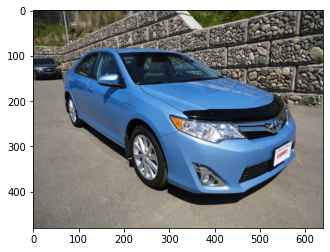

Predicted Class: Toyota
Prediction Score:  0.98573184
Expected Class: Toyota


In [ ]:
img_name = "./data/cars_test/00004.jpg"     # Expected output: Toyota

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);

print("Predicted Class: "+predictions['predicted_class'].replace('_',''))
print("Prediction Score: ",predictions['score'])
print("Expected Class: "+"Toyota")

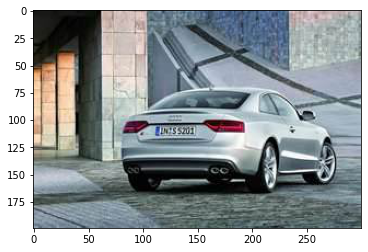

Predicted Class: Audi
Prediction Score:  0.7543776
Expected Class: Audi


In [ ]:
img_name = "./data/cars_test/00019.jpg"     # Expected output: Audi

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);

print("Predicted Class: "+predictions['predicted_class'].replace('_',''))
print("Prediction Score: ",predictions['score'])
print("Expected Class: "+"Audi")

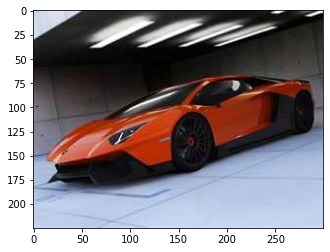

Predicted Class: Lamborghini
Prediction Score:  0.9998932
Expected Class: Lamborghini


In [ ]:
img_name = "./data/cars_test/00021.jpg"   # Expected output: Lamborghini

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);

print("Predicted Class: "+predictions['predicted_class'].replace('_',''))
print("Prediction Score: ",predictions['score'])
print("Expected Class: "+"Lamborghini")

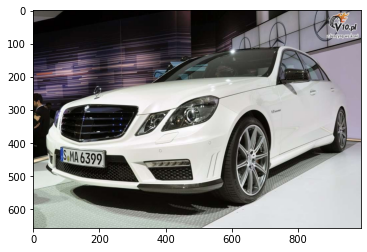

Predicted Class: Mercedes-Benz
Prediction Score:  0.93886226
Expected Class: Mercedes-Benz


In [ ]:
img_name = "./data/cars_test/00031.jpg"   # Expected output: Mercedes-Benz

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);

print("Predicted Class: "+predictions['predicted_class'].replace('_',''))
print("Prediction Score: ",predictions['score'])
print("Expected Class: "+"Mercedes-Benz")

<a id='11'></a>
# Model Classifier

In [ ]:
# Load experiment
gtf = prototype(verbose=1);
gtf.Prototype("Model_classifier", "inception-v3-pytorch")


gtf.Dataset_Params(dataset_path="data/cars_train",
                   path_to_csv="vehicles_model.csv",
                   split=0.8, 
                   input_size=299, 
                   batch_size=64, 
                   shuffle_data=True,
                   num_processors=3)

# Transform
gtf.apply_random_horizontal_flip(train=True, val=True)
gtf.apply_normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], train=True, val=True, test=True)

# Set Dataset
gtf.Dataset();

Pytorch Version: 1.6.0+cu101

Experiment Details
    Project: Model_classifier
    Experiment: inception-v3-pytorch
    Dir: /content/drive/My Drive/PilotTask/workspace/Model_classifier/inception-v3-pytorch/

Dataset Details
    Train path:     data/cars_train
    Val path:       None
    CSV train path: vehicles_model.csv
    CSV val path:   None
    Label Type:     single

Dataset Params
    Input Size:  299
    Batch Size:  64
    Data Shuffle: True
    Processors:   3
    Train-val split:   0.8
    Delimiter:   ,

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 6515
    Num val images:   1629
    Num classes:      174



In [ ]:
# Set Training parameters
gtf.Training_Params(num_epochs=10, display_progress=True, display_progress_realtime=True, 
                    save_intermediate_models=True, save_training_logs=True)

# Using RMSprop optimizer
gtf.optimizer_sgd(0.06)

# Fixed learning rate
gtf.lr_fixed()

Training params
    Num Epochs: 10

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_

Optimizer
    Name:          sgd
    Learning rate: 0.06
    Params:        {'lr': 0.06, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   fixed
    Params: {}



In [ ]:
gtf.loss_softmax_crossentropy()

Loss
    Name:          softmaxcrossentropy
    Params:        {'weight': None, 'batch_axis': 0, 'axis_to_sum_over': -1, 'label_as_categories': True, 'label_smoothing': False}



In [ ]:
# Set model parameters
gtf.Model_Params(model_name="inception_v3", freeze_base_network=True, use_gpu=True, use_pretrained=True);
# Load model
gtf.Model()
gtf.Freeze_Layers(num=100)

Model Params
    Model name:           inception_v3
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           inception_v3
        Num layers in model:  194
        Num trainable layers: 2

Model params post freezing
    Num trainable layers: 95



In [ ]:
#Start Training
gtf.Train();

## Resume training

In [ ]:
gtf = prototype(verbose=1);
gtf.Prototype("Model_classifier", "inception-v3-pytorch", resume_train=True)

Pytorch Version: 1.6.0+cu101

Model Details
    Loading model - workspace/Model_classifier/inception-v3-pytorch/output/models/resume_state
    Model Loaded on device
        Model name:                           inception_v3
        Num layers in model:  194
        Num trainable layers: 95

Experiment Details
    Project: Model_classifier
    Experiment: inception-v3-pytorch
    Dir: /content/drive/My Drive/PilotTask/workspace/Model_classifier/inception-v3-pytorch/



In [ ]:
gtf.update_num_epochs(20)   # Increase number of epochs for longer training
gtf.Reload()                # Reload model after updating the parameter

Update: Num Epochs - 20

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 6515
    Num val images:   1629
    Num classes:      174

Model Details
    Loading model - workspace/Model_classifier/inception-v3-pytorch/output/models/resume_state
    Model Loaded on device
        Model name:                           inception_v3
        Num layers in model:  194
        Num trainable layers: 95



In [ ]:
gtf.Train()

## Model Summary

In [ ]:
gtf.Summary()



Experiment Summary

System
    Project Name:    Model_classifier
    Project Dir:     workspace/Model_classifier/
    Experiment Name: inception-v3-pytorch
    Experiment Dir:  workspace/Model_classifier/inception-v3-pytorch/
    Library:         Pytorch
    Origin:          ['New', 'New']

Dataset
    Status:       True
    Dataset Type: csv_train
    Train path:   data/cars_train
    Val path:     None
    Test path:    False
    CSV Train:    vehicles_model.csv
    CSV Val:      None
    CSV Test:     False

Dataset Parameters:
    Input Size:   299
    Batch Size:   64
    Shuffle:      True
    Processors:   3
    Num Classes:  174

Dataset Transforms:
    Train transforms: [{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]
    Val transforms:   [{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]
    Test transforms:  [{'Normalize': {'mean': [0.485, 

In [ ]:
# Load for validation
gtf = prototype(verbose=0);
gtf.Prototype("Model_classifier", "inception-v3-pytorch", eval_infer=True);


# Set dataset
gtf.Dataset_Params(dataset_path="data/cars_test",
                   path_to_csv = "vehicles_model_test.csv")
gtf.Dataset();

# Validate
accuracy, class_based_accuracy = gtf.Evaluate();

In [ ]:
print("Test accuracy: ",accuracy)
# print("\nClass based accuracies: ")     # Commented due to large number of classes
# for model in class_based_accuracy:
#   print(model,": ",class_based_accuracy[model]['accuracy(%)'],"%")

Test accuracy:  83.99452804377565


##Run the trained model on some sample images

In [ ]:
# Load model for some sample outputs
gtf = prototype(verbose=0);
gtf.Prototype("Model_classifier", "inception-v3-pytorch", eval_infer=True);

In [ ]:
import matplotlib.pyplot as plt     # To display the images
import matplotlib.image as mpimg
import numpy as np

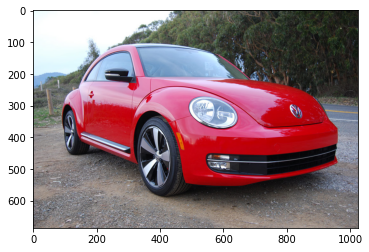

Predicted Class: Beetle
Prediction Score:  0.9993317
Expected Class: Beetle


In [ ]:
img_name = "./data/cars_test/00089.jpg"     # Expected output: Beetle

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);

print("Predicted Class: "+predictions['predicted_class'].replace('_',''))
print("Prediction Score: ",predictions['score'])
print("Expected Class: "+"Beetle")

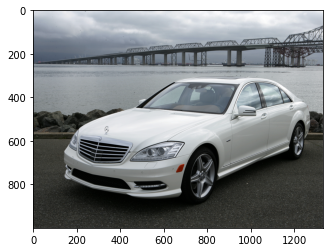

Predicted Class: S-Class
Prediction Score:  0.99433315
Expected Class: S-Class


In [ ]:
img_name = "./data/cars_test/00025.jpg"     # Expected output: S-Class

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);

print("Predicted Class: "+predictions['predicted_class'].replace('_',''))
print("Prediction Score: ",predictions['score'])
print("Expected Class: "+"S-Class")

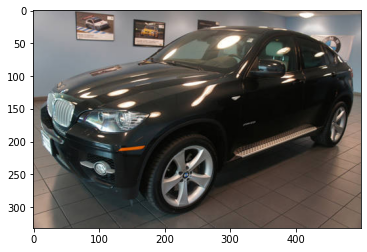

Predicted Class: X6
Prediction Score:  0.88237995
Expected Class: X6


In [ ]:
img_name = "./data/cars_test/00035.jpg"   # Expected output: X6

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);

print("Predicted Class: "+predictions['predicted_class'].replace('_',''))
print("Prediction Score: ",predictions['score'])
print("Expected Class: "+"X6")

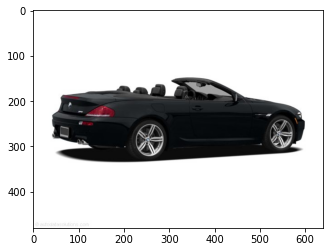

Predicted Class: M6
Prediction Score:  0.99515754
Expected Class: M6


In [ ]:
img_name = "./data/cars_test/00060.jpg"   # Expected output: M6

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);

print("Predicted Class: "+predictions['predicted_class'].replace('_',''))
print("Prediction Score: ",predictions['score'])
print("Expected Class: "+"M6")

#Year Classifier

In [ ]:
# Load experiment
gtf = prototype(verbose=1);
gtf.Prototype("Year_classifier", "inception-v3-pytorch")


gtf.Dataset_Params(dataset_path="data/cars_train",
                   path_to_csv="vehicles_year.csv",
                   split=0.8, input_size=299, 
                   batch_size=128,
                   shuffle_data=True, 
                   num_processors=3)

# Transform
gtf.apply_random_horizontal_flip(train=True, val=True)
gtf.apply_normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], train=True, val=True, test=True)

# Set Dataset
gtf.Dataset();

Pytorch Version: 1.6.0+cu101

Experiment Details
    Project: Year_classifier
    Experiment: inception-v3-pytorch
    Dir: /content/drive/My Drive/PilotTask/workspace/Year_classifier/inception-v3-pytorch/

Dataset Details
    Train path:     data/cars_train
    Val path:       None
    CSV train path: vehicles_year.csv
    CSV val path:   None
    Label Type:     single

Dataset Params
    Input Size:  299
    Batch Size:  128
    Data Shuffle: True
    Processors:   3
    Train-val split:   0.8
    Delimiter:   ,

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 6515
    Num val images:   1629
    Num classes:      16



In [ ]:
# Set model parameters
gtf.Model_Params(model_name="inception_v3", freeze_base_network=True, use_gpu=True, use_pretrained=True)

# Load model
gtf.Model()

gtf.Freeze_Layers(num=100)

Model Params
    Model name:           inception_v3
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           inception_v3
        Num layers in model:  194
        Num trainable layers: 2

Model params post freezing
    Num trainable layers: 95



In [ ]:
# Set Training parameters
gtf.Training_Params(num_epochs=5, display_progress=True, display_progress_realtime=True, 
                    save_intermediate_models=True, save_training_logs=True)

# Using RMSprop optimizer
gtf.optimizer_sgd(0.06)

# Fixed learning rate
gtf.lr_fixed()

Training params
    Num Epochs: 5

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_

Optimizer
    Name:          sgd
    Learning rate: 0.06
    Params:        {'lr': 0.06, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   fixed
    Params: {}



In [ ]:
gtf.loss_softmax_crossentropy()

Loss
    Name:          softmaxcrossentropy
    Params:        {'weight': None, 'batch_axis': 0, 'axis_to_sum_over': -1, 'label_as_categories': True, 'label_smoothing': False}



In [ ]:
#Start Training
gtf.Train();

## Resume training

In [ ]:
gtf = prototype(verbose=1);
gtf.Prototype("Year_classifier", "inception-v3-pytorch", resume_train=True)

Pytorch Version: 1.6.0+cu101

Model Details
    Loading model - workspace/Year_classifier/inception-v3-pytorch/output/models/resume_state
    Model Loaded on device
        Model name:                           inception_v3
        Num layers in model:  194
        Num trainable layers: 95

Experiment Details
    Project: Year_classifier
    Experiment: inception-v3-pytorch
    Dir: /content/drive/My Drive/PilotTask/workspace/Year_classifier/inception-v3-pytorch/



In [ ]:
gtf.update_num_epochs(20)   # Increase number of epochs for longer training
gtf.Reload()                # Reload model after updating the parameter

Update: Num Epochs - 20

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 6515
    Num val images:   1629
    Num classes:      16

Model Details
    Loading model - workspace/Year_classifier/inception-v3-pytorch/output/models/resume_state
    Model Loaded on device
        Model name:                           inception_v3
        Num layers in model:  194
        Num trainable layers: 95



In [ ]:
gtf.Train()

## Model Summary

In [ ]:
gtf.Summary()



Experiment Summary

System
    Project Name:    Year_classifier
    Project Dir:     workspace/Year_classifier/
    Experiment Name: inception-v3-pytorch
    Experiment Dir:  workspace/Year_classifier/inception-v3-pytorch/
    Library:         Pytorch
    Origin:          ['New', 'New']

Dataset
    Status:       True
    Dataset Type: csv_train
    Train path:   data/cars_train
    Val path:     None
    Test path:    False
    CSV Train:    vehicles_year.csv
    CSV Val:      None
    CSV Test:     False

Dataset Parameters:
    Input Size:   299
    Batch Size:   128
    Shuffle:      True
    Processors:   3
    Num Classes:  16

Dataset Transforms:
    Train transforms: [{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]
    Val transforms:   [{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]
    Test transforms:  [{'Normalize': {'mean': [0.485, 0.45

In [ ]:
# Load for validation

gtf = prototype(verbose=0)
gtf.Prototype("Year_classifier", "inception-v3-pytorch", eval_infer=True)


# Set dataset
gtf.Dataset_Params(dataset_path="data/cars_test",
                   path_to_csv = "vehicles_year_test.csv")
gtf.Dataset();


# Validate
accuracy, class_based_accuracy = gtf.Evaluate();

In [ ]:
print("Test accuracy: ",accuracy)
print("\nClass based accuracies: ")
for model in class_based_accuracy:
  print(model,": ",class_based_accuracy[model]['accuracy(%)'],"%")

Test accuracy:  83.18617087426937

Class based accuracies: 
1991 :  82.6086956521739 %
1993 :  88.32116788321169 %
1994 :  92.80000000000001 %
1997 :  76.74418604651163 %
1998 :  69.56521739130434 %
1999 :  75.0 %
2000 :  79.54545454545455 %
2001 :  73.86363636363636 %
2002 :  75.55555555555556 %
2006 :  42.22222222222222 %
2007 :  70.70610687022901 %
2008 :  62.056737588652474 %
2009 :  67.4812030075188 %
2010 :  52.33415233415234 %
2011 :  52.103559870550164 %
2012 :  94.27850231384097 %


##Run the trained model on some sample images

In [ ]:
# Load model for some sample outputs
gtf = prototype(verbose=0);
gtf.Prototype("Year_classifier", "inception-v3-pytorch", eval_infer=True);

In [ ]:
import matplotlib.pyplot as plt     # To display the images
import matplotlib.image as mpimg

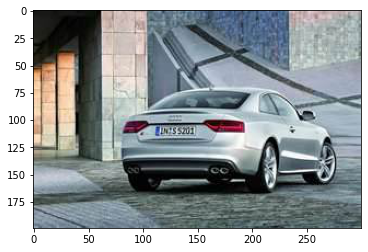

Predicted Class: 2012
Prediction Score:  0.9993736
Expected Class: 2012


In [ ]:
img_name = "./data/cars_test/00019.jpg"     # Expected output: 2012

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);
print("Predicted Class: "+predictions['predicted_class'].replace('_',''))
print("Prediction Score: ",predictions['score'])
print("Expected Class: "+"2012")

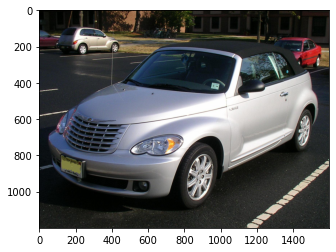

Predicted Class: 2008
Prediction Score:  0.96509093
Expected Class: 2008


In [ ]:
img_name = "./data/cars_test/00023.jpg"     # Expected output: 2008

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);
print("Predicted Class: "+predictions['predicted_class'].replace('_',''))
print("Prediction Score: ",predictions['score'])
print("Expected Class: "+"2008")

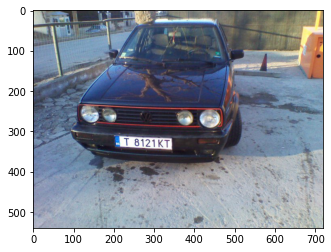

Predicted Class: 1991
Prediction Score:  0.9977338
Expected Class: 1991


In [ ]:
img_name = "./data/cars_test/00026.jpg"   # Expected output: 1991

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);
print("Predicted Class: "+predictions['predicted_class'].replace('_',''))
print("Prediction Score: ",predictions['score'])
print("Expected Class: "+"1991")

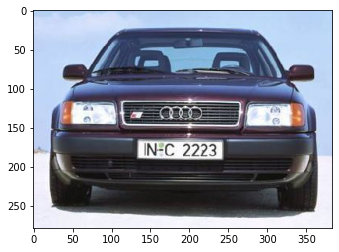

Predicted Class: 1994
Prediction Score:  0.79095423
Expected Class: 1994


In [ ]:
img_name = "./data/cars_test/00070.jpg"   # Expected output: 1994

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);
print("Predicted Class: "+predictions['predicted_class'].replace('_',''))
print("Prediction Score: ",predictions['score'])
print("Expected Class: "+"1994")